<a href="https://colab.research.google.com/github/tjdudgml3/ms_aischool/blob/main/%EB%A1%9C%EC%9D%B4%ED%84%B0%EA%B8%B0%EC%82%AC_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#로이터기사 데이터셋 로드

from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [23]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [24]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
train_labels[0]

3

In [7]:
#데이터준비
def vectorize_sequences(sequences, dimension = 10000):
  
  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

# 데이터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [15]:
#라벨 데이터의 엔코딩
def to_one_hot_encoding(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))

  for i, sequence in enumerate(labels):
    results[i, sequence] = 1

  return results

one_hot_train_labels  = to_one_hot_encoding(train_labels)
one_hot_test_labels = to_one_hot_encoding(test_labels)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [ 3  4  3 ... 25  3 25]


In [28]:
#categorical 데이터로 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [29]:
print(one_hot_train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [73]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(52, activation = 'relu'))
model.add(layers.Dense(52, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))



In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640064    
                                                                 
 dense_10 (Dense)            (None, 52)                3380      
                                                                 
 dense_11 (Dense)            (None, 52)                2756      
                                                                 
 dense_12 (Dense)            (None, 46)                2438      
                                                                 
Total params: 648,638
Trainable params: 648,638
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [76]:
#훈련데이터의 준비

x_val = x_train[:1000]
partitial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partitial_y_train = one_hot_train_labels[1000:]

In [77]:
history = model.fit(partitial_x_train,partitial_y_train, validation_data=(x_val,y_val), epochs = 20, batch_size = 512)

Epoch 1/20
16/16 [==============================] - 1s 59ms/step - loss: 3.4775 - accuracy: 0.2794 - val_loss: 2.8876 - val_accuracy: 0.4770
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 2.2823 - accuracy: 0.5431 - val_loss: 1.7570 - val_accuracy: 0.6060
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.5003 - accuracy: 0.6840 - val_loss: 1.3743 - val_accuracy: 0.6960
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 1.1463 - accuracy: 0.7473 - val_loss: 1.1822 - val_accuracy: 0.7330
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8984 - accuracy: 0.8013 - val_loss: 1.0674 - val_accuracy: 0.7660
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.7032 - accuracy: 0.8396 - val_loss: 1.0005 - val_accuracy: 0.7850
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5359 - accuracy: 0.8772 - val_loss: 0.9708 - val_accuracy: 0.8010
Epoch 8/20
16

In [78]:
#학습결과 가져오기
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)



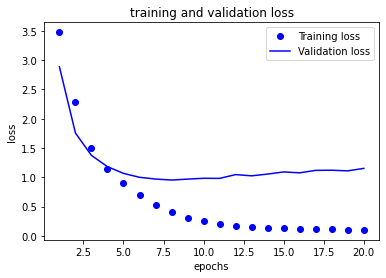

In [79]:
plt.plot(epochs,loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

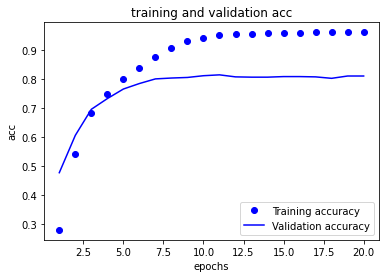

In [80]:
plt.plot(epochs,acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b-', label = 'Validation accuracy')
plt.title('training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()